My personal dataset is coming from Kaggle: https://www.kaggle.com/datasets/dhanasekarjaisankar/correlation-between-posture-personality-trait?resource=download

This dataset is a newly posted dataset that contains a data sample that claims that there is a correlation between our posture and personality trait. The main reason I choose this dataset because it looks really interesting to me and I want to see if the hypothesis is true. Additionally, I am quite familiar with Briggs Type Indicator (MBTI) test because me and my friends took this test a few years ago.

Data Description:
Posture - ideal posture (A), kyphosis-lordosis (B), flat back (C), sway-back (D)
The results from the personality inventory (MBTI) came in the form of a combination of letters [Extraversion, Introversion, Sensing, Intuition, Thinking, Feeling, Judging, and Perceiving], and numbers, 1–26. The pain consist of Pain-1 (pain in the neck), Pain-2 (pain in the thoracic), Pain-3 (pain in the lumbar), Pain-4 (pain in other body parts). The pain scale data consisted of a number between 0(low) to 10 (high).

In [1]:
df = spark.read.csv('hdfs://orion11:23001/myers_briggs_table.csv', header=True)

In [2]:
df.printSchema()

root
 |-- S No: string (nullable = true)
 |-- AGE: string (nullable = true)
 |-- HEIGHT: string (nullable = true)
 |-- WEIGHT: string (nullable = true)
 |-- SEX: string (nullable = true)
 |-- ACTIVITY LEVEL: string (nullable = true)
 |-- PAIN 1: string (nullable = true)
 |-- PAIN 2: string (nullable = true)
 |-- PAIN 3: string (nullable = true)
 |-- PAIN 4: string (nullable = true)
 |-- MBTI: string (nullable = true)
 |-- E: string (nullable = true)
 |-- I: string (nullable = true)
 |-- S: string (nullable = true)
 |-- N: string (nullable = true)
 |-- T: string (nullable = true)
 |-- F: string (nullable = true)
 |-- J: string (nullable = true)
 |-- P: string (nullable = true)
 |-- POSTURE: string (nullable = true)



In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import category_encoders as ce
import seaborn as sns

df_pd = df.toPandas()

df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   S No            97 non-null     object
 1   AGE             97 non-null     object
 2   HEIGHT          97 non-null     object
 3   WEIGHT          97 non-null     object
 4   SEX             97 non-null     object
 5   ACTIVITY LEVEL  97 non-null     object
 6   PAIN 1          97 non-null     object
 7   PAIN 2          97 non-null     object
 8   PAIN 3          97 non-null     object
 9   PAIN 4          97 non-null     object
 10  MBTI            97 non-null     object
 11  E               97 non-null     object
 12  I               97 non-null     object
 13  S               97 non-null     object
 14  N               97 non-null     object
 15  T               97 non-null     object
 16  F               97 non-null     object
 17  J               97 non-null     object
 18  P           

Based on the result above, it seems like the data is pretty clean which we do not have null/missing data

In [4]:
df_pd.describe()

,S No,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
count,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97,97
unique,97,53,17,55,2,3,15,17,15,17,15,20,20,20,20,23,23,21,21,4
top,24,45,62,160,Female,Low,0,0,0,0,ESFP,18,5,14,12,12,12,17,20,B
freq,1,6,12,5,49,74,44,26,48,49,12,9,9,9,9,9,9,8,8,36


In the quick data analysis above, we can see that this data contains more female than male - 49 female and 48 male. This data contains people from various ages and 15 unique MBTI personalities.

In [5]:
# Quick snapshot of what the data lookslike
df_pd.head()

,S No,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,1,53,62,125,Female,Low,0,0,0,0,ESFJ,18,3,17,9,9,13,18,4,A
1,2,52,69,157,Male,High,7,8,5,3,ISTJ,6,15,14,12,21,3,13,9,B
2,3,30,69,200,Male,High,0,0,0,0,ESTJ,15,6,16,10,15,9,12,10,A
3,4,51,66,175,Male,Moderate,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,D
4,5,45,63,199,Female,Moderate,4,5,2,2,ENFJ,14,7,20,6,9,15,16,6,A


In [8]:
label_mapping = {"Low": 0, "Moderate": 1, "High": 2}
df_pd_to_int = df_pd.replace({"ACTIVITY LEVEL": label_mapping})

# Convert string to float
df_pd_to_int = df_pd_to_int[["ACTIVITY LEVEL", "AGE", "HEIGHT", "WEIGHT", "E", "I", "S", "N", "T", "F", "J", "P", "PAIN 1", "PAIN 2", "PAIN 3", "PAIN 4"]].astype(float)

# Look at the correlation of the data
df_pd_to_int.corr()

,ACTIVITY LEVEL,AGE,HEIGHT,WEIGHT,E,I,S,N,T,F,J,P,PAIN 1,PAIN 2,PAIN 3,PAIN 4
ACTIVITY LEVEL,1.000000,-0.276924,0.167003,-0.031022,0.087801,-0.086238,-0.211236,0.196499,0.011277,-0.006288,-0.079191,0.079418,0.024169,0.015889,-0.068360,-0.172473
AGE,-0.276924,1.000000,-0.029032,0.272758,-0.142834,0.148011,0.187521,-0.226657,0.122728,-0.122113,0.040815,-0.042563,0.027261,0.033753,-0.029102,0.237561
HEIGHT,0.167003,-0.029032,1.000000,0.550871,-0.069721,0.066289,-0.185371,0.210886,0.281758,-0.273833,0.150515,-0.150459,-0.151540,0.142741,0.093184,-0.080791
WEIGHT,-0.031022,0.272758,0.550871,1.000000,0.096684,-0.096387,-0.065644,0.097805,0.230846,-0.222772,0.002692,-0.004312,-0.063969,0.108953,0.112692,0.217559
E,0.087801,-0.142834,-0.069721,0.096684,1.000000,-0.999054,-0.198599,0.181410,-0.106528,0.100865,-0.242505,0.239054,-0.183280,-0.120502,-0.114181,0.157455
I,-0.086238,0.148011,0.066289,-0.096387,-0.999054,1.000000,0.200561,-0.183200,0.108292,-0.102653,0.237849,-0.234369,0.188412,0.122371,0.114518,-0.156818
S,-0.211236,0.187521,-0.185371,-0.065644,-0.198599,0.200561,1.000000,-0.954230,0.165845,-0.164245,0.190320,-0.187848,0.011468,-0.077804,0.005610,0.021883
N,0.196499,-0.226657,0.210886,0.097805,0.181410,-0.183200,-0.954230,1.000000,-0.180797,0.180435,-0.168059,0.165458,-0.047964,0.031393,-0.037232,-0.059867
T,0.011277,0.122728,0.281758,0.230846,-0.106528,0.108292,0.165845,-0.180797,1.000000,-0.998779,0.216677,-0.221061,-0.035927,0.005433,0.067007,0.082855
F,-0.006288,-0.122113,-0.273833,-0.222772,0.100865,-0.102653,-0.164245,0.180435,-0.998779,1.000000,-0.222047,0.226472,0.036701,-0.000086,-0.063873,-0.081734


Text(0.5, 1.0, 'Data Correlation')

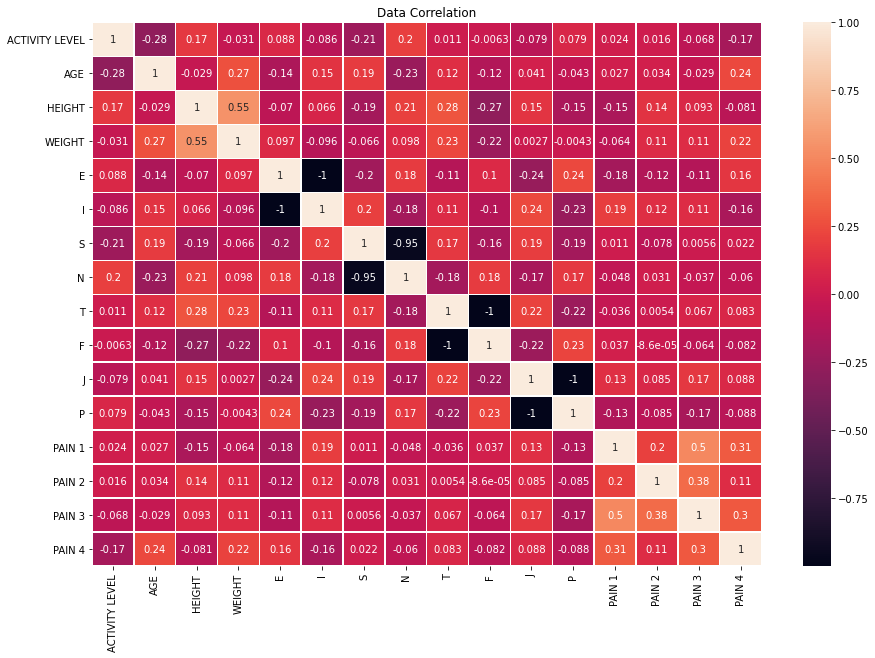

In [9]:
# It is easier to read the correlation through a heatmap
fig, ax = plt.subplots(figsize=(15,10))   
sns.heatmap(df_pd_to_int.corr(), annot=True, linewidths=.5, ax=ax)

plt.title('Data Correlation')

Based on the heatmap above, we can see that it works pretty well. It show negative correlation for Extrovert and Introvert, Sensing and Intuition, and the others personalities as it should be. We can also see that the people who has pain in the neck will has 50% of having pain in the thoracic too.

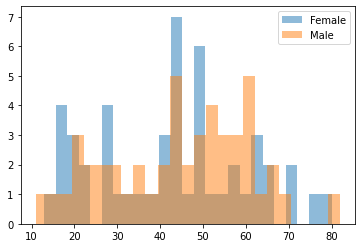

In [13]:
# Next, let's see the distribution of the people ages in this data
df_female = df_pd[(df_pd['SEX'] == 'Female')]
df_male = df_pd[(df_pd['SEX'] == 'Male')]

x = df_female['AGE'].astype(int)
y = df_male['AGE'].astype(int)

plt.hist(x, bins=25, alpha=0.5, label='Female')
plt.hist(y, bins=25, alpha=0.5, label='Male')
plt.legend(loc='upper right')
plt.show()

It seems like the data is not evenly distributed accross all ages for both female and male.

In [ ]:
# Activity level distribution for the people
x = df_female['AGE']

In [ ]:
df_pd_encode_posture = ce.BinaryEncoder(cols = ['POSTURE'])
df_pd_encode_posture = df_pd_encode_posture.fit_transform(df_pd['POSTURE'])
df_pd_encode_posture